## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zuoo5\Anaco

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 122us/step - loss: 2.2687 - acc: 0.1598 - val_loss: 2.2230 - val_acc: 0.1960
Epoch 2/500
50000/50000 [==============================] - 3s 57us/step - loss: 2.1946 - acc: 0.2197 - val_loss: 2.1651 - val_acc: 0.2391
Epoch 3/500
50000/50000 [==============================] - 3s 57us/step - loss: 2.1425 - acc: 0.2498 - val_loss: 2.1173 - val_acc: 0.2643
Epoch 4/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.0983 - acc: 0.2673 - val_loss: 2.0760 - val_acc: 0.2781
Epoch 5/500
50000/50000 [==============================] - 3s 54us/step - loss: 2.0592 - acc: 0.2779 - val_loss: 2.0395 - val_acc: 0.2805
Epoch 6/500
50000/50000 [==============================] - 3s 57us/step - loss: 2.0256 - acc: 0.2893 - val_loss: 2.0094 - val_acc: 0.2905
Epoch 7/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.9976 - acc: 0.2979 - val_loss: 1.9841 -

50000/50000 [==============================] - 3s 57us/step - loss: 1.6504 - acc: 0.4253 - val_loss: 1.6562 - val_acc: 0.4230
Epoch 60/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.6473 - acc: 0.4274 - val_loss: 1.6541 - val_acc: 0.4229
Epoch 61/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.6441 - acc: 0.4279 - val_loss: 1.6503 - val_acc: 0.4260
Epoch 62/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6409 - acc: 0.4306 - val_loss: 1.6489 - val_acc: 0.4240
Epoch 63/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6379 - acc: 0.4308 - val_loss: 1.6489 - val_acc: 0.4277
Epoch 64/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6349 - acc: 0.4328 - val_loss: 1.6425 - val_acc: 0.4285
Epoch 65/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6317 - acc: 0.4330 - val_loss: 1.6450 - val_acc: 0.4244
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5016 - acc: 0.4758 - val_loss: 1.5311 - val_acc: 0.4597
Epoch 119/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4998 - acc: 0.4769 - val_loss: 1.5305 - val_acc: 0.4620
Epoch 120/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4974 - acc: 0.4767 - val_loss: 1.5247 - val_acc: 0.4641
Epoch 121/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4950 - acc: 0.4785 - val_loss: 1.5243 - val_acc: 0.4600
Epoch 122/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4937 - acc: 0.4794 - val_loss: 1.5251 - val_acc: 0.4657
Epoch 123/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4916 - acc: 0.4793 - val_loss: 1.5204 - val_acc: 0.4666
Epoch 124/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4898 - acc: 0.4814 - val_loss: 1.5195 - val_acc: 0.4657
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 56us/step - loss: 1.3988 - acc: 0.5116 - val_loss: 1.4536 - val_acc: 0.4864
Epoch 177/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.3973 - acc: 0.5129 - val_loss: 1.4543 - val_acc: 0.4809
Epoch 178/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.3962 - acc: 0.5123 - val_loss: 1.4524 - val_acc: 0.4815
Epoch 179/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3944 - acc: 0.5130 - val_loss: 1.4531 - val_acc: 0.4873
Epoch 180/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.3927 - acc: 0.5133 - val_loss: 1.4607 - val_acc: 0.4852
Epoch 181/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.3911 - acc: 0.5150 - val_loss: 1.4491 - val_acc: 0.4870
Epoch 182/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.3891 - acc: 0.5161 - val_loss: 1.4562 - val_acc: 0.4842
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 58us/step - loss: 1.3152 - acc: 0.5406 - val_loss: 1.4148 - val_acc: 0.4983
Epoch 235/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3137 - acc: 0.5418 - val_loss: 1.4097 - val_acc: 0.5032
Epoch 236/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.3126 - acc: 0.5419 - val_loss: 1.4039 - val_acc: 0.5034
Epoch 237/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3106 - acc: 0.5427 - val_loss: 1.4052 - val_acc: 0.5006
Epoch 238/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3102 - acc: 0.5421 - val_loss: 1.4040 - val_acc: 0.5045
Epoch 239/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3084 - acc: 0.5432 - val_loss: 1.3996 - val_acc: 0.5074
Epoch 240/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3067 - acc: 0.5432 - val_loss: 1.4093 - val_acc: 0.5026
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 57us/step - loss: 1.2416 - acc: 0.5661 - val_loss: 1.3862 - val_acc: 0.5128
Epoch 293/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2409 - acc: 0.5659 - val_loss: 1.3783 - val_acc: 0.5106
Epoch 294/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2383 - acc: 0.5670 - val_loss: 1.3758 - val_acc: 0.5122
Epoch 295/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2374 - acc: 0.5680 - val_loss: 1.3744 - val_acc: 0.5132
Epoch 296/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2361 - acc: 0.5673 - val_loss: 1.3740 - val_acc: 0.5124s - lo
Epoch 297/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2354 - acc: 0.5683 - val_loss: 1.3825 - val_acc: 0.5156
Epoch 298/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2344 - acc: 0.5691 - val_loss: 1.3758 - val_acc: 0.5127
Epoch 299/500
50000/50000 [=

50000/50000 [==============================] - 3s 58us/step - loss: 1.1732 - acc: 0.5904 - val_loss: 1.3678 - val_acc: 0.5155
Epoch 351/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1720 - acc: 0.5906 - val_loss: 1.3500 - val_acc: 0.5213
Epoch 352/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1707 - acc: 0.5916 - val_loss: 1.3676 - val_acc: 0.5168
Epoch 353/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1703 - acc: 0.5912 - val_loss: 1.3484 - val_acc: 0.5211
Epoch 354/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1693 - acc: 0.5914 - val_loss: 1.3445 - val_acc: 0.5237
Epoch 355/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1670 - acc: 0.5943 - val_loss: 1.3604 - val_acc: 0.5184
Epoch 356/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1661 - acc: 0.5949 - val_loss: 1.3755 - val_acc: 0.5174
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 58us/step - loss: 1.1086 - acc: 0.6140 - val_loss: 1.3748 - val_acc: 0.5131
Epoch 409/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1084 - acc: 0.6151 - val_loss: 1.3465 - val_acc: 0.5282
Epoch 410/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1057 - acc: 0.6150 - val_loss: 1.3433 - val_acc: 0.5297
Epoch 411/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1051 - acc: 0.6157 - val_loss: 1.3510 - val_acc: 0.5254
Epoch 412/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1047 - acc: 0.6147 - val_loss: 1.3425 - val_acc: 0.5234
Epoch 413/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1027 - acc: 0.6161 - val_loss: 1.3353 - val_acc: 0.5282
Epoch 414/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1026 - acc: 0.6163 - val_loss: 1.3483 - val_acc: 0.5240
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 54us/step - loss: 1.0471 - acc: 0.6372 - val_loss: 1.3403 - val_acc: 0.5323
Epoch 467/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.0451 - acc: 0.6381 - val_loss: 1.3527 - val_acc: 0.5294
Epoch 468/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0441 - acc: 0.6378 - val_loss: 1.5111 - val_acc: 0.4885
Epoch 469/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0460 - acc: 0.6375 - val_loss: 1.3383 - val_acc: 0.5307
Epoch 470/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.0479 - acc: 0.6359 - val_loss: 1.3294 - val_acc: 0.5310
Epoch 471/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0425 - acc: 0.6375 - val_loss: 1.3738 - val_acc: 0.5208
Epoch 472/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0420 - acc: 0.6378 - val_loss: 1.3506 - val_acc: 0.5303
Epoch 473/500
50000/50000 [=======

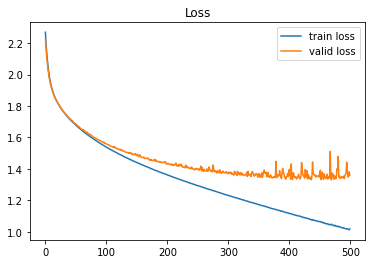

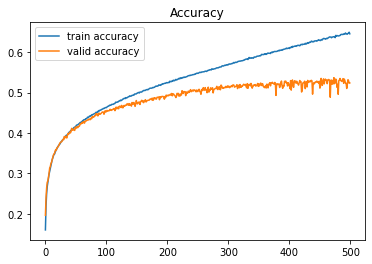

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()